df = data frame
X = data frame of predictors
y = target to be explained by the model
yhat = predicited value of y using the model


In [6]:
#Import a load of packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import warnings
import numpy as np
import pandas as pd
import patsy

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.cross_validation import KFold

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline


In [65]:
data = {'Col0' : ['row1', 'row2','row3', 'row4', 'row5', 'row6', 'row_7', 'row_8', 'Row9', 'Row10'],
        'Col1' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
       'col2' : [1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9, 10.10],
       'col3' : [-4, -3, -2, -1, 0, 1, 2, 'Nan', 4, 5],
       'col_a' : ['aaa', 'bbb', 'ccc', 'ddd', 'eee', 'fff', 'ggg', 'hhh', 'iii', 'jjj'],
       'col_b' : ['red', 'blue', 'green', 'orange', 'yellow', 'purple', 'white', 'black', 'brown', 'gray'],
        'colc' : ['square','square','square', 'circle', 'circle', 'circle', 'triangle', 'triangle', 'triangle','triangle'],
       'ycol' : [True, True, True, True, True, False, False, False, False, False],
       'col4' : ['excellent', 'excellent', 'very good', 'very good', 'good', 'good', 'fair', 'fair', 'appalling', 'appalling']}
df = pd.DataFrame(data)
df

,Col0,Col1,col2,col3,col4,col_a,col_b,colc,ycol
0,row1,1,1.1,-4,excellent,aaa,red,square,True
1,row2,2,2.2,-3,excellent,bbb,blue,square,True
2,row3,3,3.3,-2,very good,ccc,green,square,True
3,row4,4,4.4,-1,very good,ddd,orange,circle,True
4,row5,5,5.5,0,good,eee,yellow,circle,True
5,row6,6,6.6,1,good,fff,purple,circle,False
6,row_7,7,7.7,2,fair,ggg,white,triangle,False
7,row_8,8,8.8,Nan,fair,hhh,black,triangle,False
8,Row9,9,9.9,4,appalling,iii,brown,triangle,False
9,Row10,10,10.1,5,appalling,jjj,gray,triangle,False


In [37]:
import category_encoders as ce

# encoder = ce.BackwardDifferenceEncoder(cols=[...])
# encoder = ce.BinaryEncoder(cols=[...])
# encoder = ce.HashingEncoder(cols=[...])
# encoder = ce.HelmertEncoder(cols=[...])
# encoder = ce.OneHotEncoder(cols=['col4'])
# encoder = ce.OrdinalEncoder(cols=['col4'])
encoder = ce.OrdinalEncoder(cols=['col4'])
# encoder = ce.SumEncoder(cols=[...])
# encoder = ce.PolynomialEncoder(cols=[...])
# encoder = ce.BaseNEncoder(cols=[...])
# encoder = ce.TargetEncoder(cols=[...])
# encoder = ce.LeaveOneOutEncoder(cols=[...])

df_clean = encoder.fit_transform(df)
# X_cleaned = encoder.transform(X_dirty)
df_clean

,Col0,Col1,col2,col3,col_a,col_b,colc,ycol,col4
0,row1,0,0.0,-4,aaa,red,square,1,1
1,row2,1,1.1,-3,bbb,blue,square,1,1
2,row3,2,2.2,-2,ccc,green,square,1,2
3,row4,3,3.3,-1,ddd,orange,circle,1,2
4,row5,4,4.4,0,eee,yellow,circle,1,3
5,row6,5,5.5,1,fff,purple,circle,0,3
6,row_7,6,6.6,2,ggg,white,triangle,0,4
7,row_8,7,7.7,Nan,hhh,black,triangle,0,4
8,Row9,8,8.8,4,iii,brown,triangle,0,5
9,Row10,9,9.9,5,jjj,gray,triangle,0,5


In [38]:
# Encode Boolean 
df['ycol'] = df['ycol']*1
df['ycol']


0    1
1    1
2    1
3    1
4    1
5    0
6    0
7    0
8    0
9    0
Name: ycol, dtype: int64

In [28]:
df = pd.DataFrame({
        'name': ['The Dude', 'Walter', 'Donny', 'The Stranger', 'Brandt', 'Bunny'],
        'haircolor': ['brown', 'brown', 'brown', 'silver', 'blonde', 'blonde'],
        'gender': ['male', 'male', 'male', 'male', 'male', 'female'],
        'drink': ['caucasian', 'beer', 'beer', 'sasparilla', 'unknown', 'unknown'],
        'age': [48, 49, 45, 63, 40, 23] 
    },
    columns=['name', 'haircolor', 'gender', 'drink', 'age']
)
encoder = ce.OrdinalEncoder(cols=['haircolor'])
df_onehot = encoder.fit_transform(df)
df_onehot

,name,gender,drink,age,haircolor
0,The Dude,male,caucasian,48,1
1,Walter,male,beer,49,1
2,Donny,male,beer,45,1
3,The Stranger,male,sasparilla,63,2
4,Brandt,male,unknown,40,3
5,Bunny,female,unknown,23,3


In [68]:

from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=3)
poly_df = pf.fit_transform([df['Col1'], df['col2']][:3])
poly_df = pd.DataFrame(poly_df, columns=pf.get_feature_names())
#pf.get_feature_names()

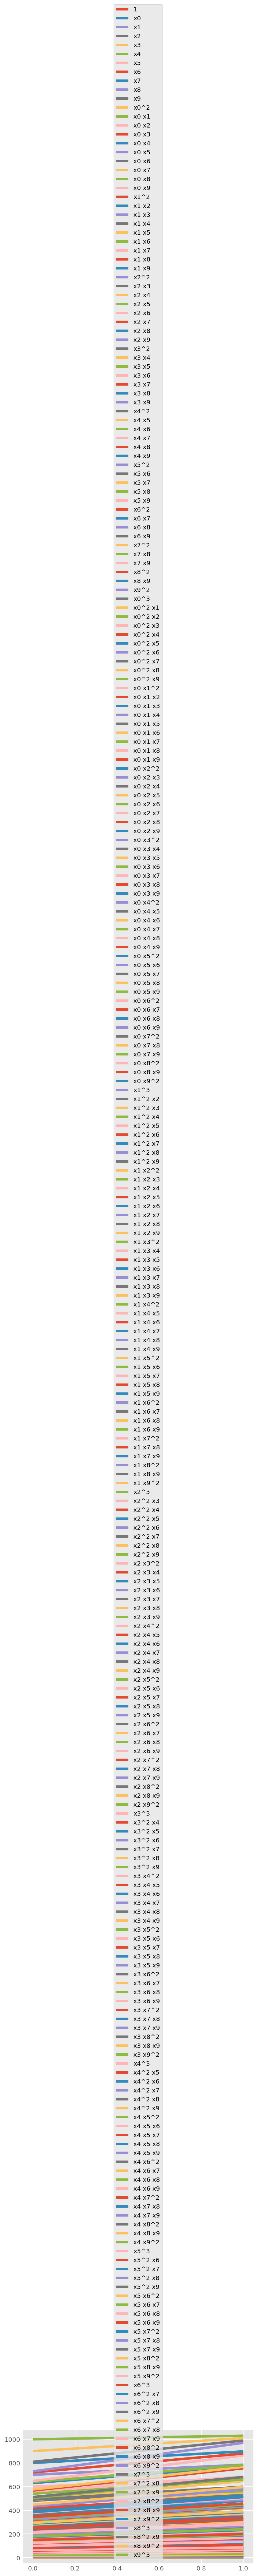

In [69]:
poly_df.plot();

In [4]:
#Import the cleaned dat_file
df = pd.read_pickle('filename.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'filename.pkl'

In [ ]:
df.shape
df.columns

In [ ]:
#subsetting based on word in row:
df = df.loc[df['col1'].str.contains('word')] 

In [2]:
# create a heatmap: remove non-numerical columns first
df.drop(['col1','col2','col3'], axis=1, inplace=True)
    
corrs = df.corr()

# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(11,7))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corrs, mask=mask, annot=True) #with numbers
#ax = sns.heatmap(corr, mask=mask, ax=ax) #withoutnumbers
# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.    
plt.show()

In [ ]:
#for a simple model plot each Xcol to y(ensuring linear relation)
sns.jointplot(df['Xcol1'].values, y)
sns.jointplot(df[[c for c in df.columns if not c in ['col1', 'col2']]].values, y)
sns.jointplot(df[[c for c in df.columns if c.startswith('XyZ)].values, y)

In [ ]:
#or more fancy:
sns.set(font_scale=1.5)
g = sns.PairGrid(df) # or 
g = g.map_lower(sns.regplot)    # regression plots in lower tri
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)  # KDE plots in upper tri
g = g.map_diag(plt.hist)        # histograms along diagonal

plt.show()

In [ ]:
sns.factorplot(x='col1_label', y='label', 
               data=df, kind='bar', aspect=3
              ).set_xticklabels(rotation=45, horizontalalignment='right',
              fontsize=20).set_yticklabels(fontsize=20)
plt.xlabel('col1_label',fontsize=24)
plt.ylabel('label',fontsize=24)
plt.show()

In [ ]:
#pair plot with hue can be useful:
sns.pairplot(data=df, vars=['col1','col2'], hue = 'col3')


In [ ]:
#Q-Q-Plot
# a normal distribution seems to be a poor approximation for the values on the extremities of the distribution.
# since we intend to use the median of the salary as the main metric, the model shouldn't be too impacted by that.
fig = plt.figure(figsize=(15, 8))
ax = plt.gca()
qqplot(np.array(salary_data['parsed_salary']), line='s', fit=True, ax=ax)
plt.xlabel('Theoretical Quantiles', fontsize=16)
plt.ylabel('Sample Quantiles', fontsize=16)
ax.set_title("Salary's Q-Q plot\n", fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
#prettier heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(method='spearman'), cmap='coolwarm', center=0, annot=True)
plt.yticks(rotation=0);

### Non linears

In [ ]:
#now investigate just the relationship between mpg and horsepower, log horsepower, and inverse horsepower:
fig, ax = plt.subplots(ncols=3, figsize=(15,6))
df.plot.scatter(x='col1',y='col2', ax=ax[0])
ax[1].scatter(np.log(data['col1']), df['col2'],20)
ax[1].set_xlabel('log col1')
ax[2].scatter(1/(df['col1']), data['col2'],20)
ax[2].set_xlabel('inverse col2');

## Define X and y

In [1]:
# remove categorical features
df.drop(['col1', 'col2', 'col3'], axis=1, inplace=True)
#or dummify
pd.get_dummies(df,columns=['col1'])
#X = pd.get_dummies(X,drop_first=True) #drop_first=True if using in a model

# if you do not use patsy:
define X and y
X = df.drop('yCol', axis=1)
# or
X = [['col1', 'col2', 'col3']] #!!!!!! [[]] 
y = df['ycol'].values
#or
X = df[[c for c in df.columns if not c in ['col1', 'col2']]]
X = df[[c for c in df.columns if c.startswith('XyZ)]
#or with y in last column
feature_set = X  == data.iloc[:, :-1]
target = y == data.iloc[:, -1]




## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

* A best practise is to do both a train test split and a cross val on the X train

## Pre-processing
### Scale

In [ ]:
from sklearn.preprocessing import StandardScaler

#Scale data your X's (not y!!!!, you would loose units standardizing  on y)
#Standardizing centers data around 0 with std 1
#Normalisation forces the standard between 0 and 1; 
#DEcTREES: scale y is possible(and wise!)
# initialize the Scaler
ss = StandardScaler()
# Fit the data using the scaler (scale the data)
X = ss.fit(X_train.values) #scale on X-train
#or subset X = ss.fit_transform(df[['col1', 'col2']]) 
X_train = ss.transform(X_train)#transform the data sets
X_test= ss.transform(X_test)
print (X.mean(), X.std())

#In DF formate:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

` StandardScaler Methods`

`fit(X[, y])`Compute the mean and std to be used for later scaling.

`fit_transform(X[, y])`	Fit to data, then transform it.

`get_params([deep])`	Get parameters for this estimator.

`inverse_transform(X[, copy])`	Scale back the data to the original representation

`partial_fit(X[, y])`	Online computation of mean and std on X for later scaling.

`set_params(**params)`	Set the parameters of this estimator.

`transform(X[, y, copy])`	Perform standardization by centering and scaling

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
#this is a preprocessing transformer, so we use .fit and .transform
#and we can put it in a pipeline
# creating a dataframe to explore what polynomial features does
trial_df = pd.DataFrame({'A':[1,3,2,5],'B':[10,0,2,4]})
trial_df
# creating a PolynomialFeatures object and transforming our dataframe
pf = PolynomialFeatures(degree=3)
poly_df = pf.fit_transform(trial_df)
poly_df
# creating a PolynomialFeatures object and transforming our dataframe
pf = PolynomialFeatures(degree=3)
poly_df = pf.fit_transform(trial_df)
poly_df
#adding in the column names
pd.DataFrame(poly_df, columns=pf.get_feature_names(trial_df.columns))
#let's try to apply a PolynomialFeatures transformation, without the bias term
pf_mpg = PolynomialFeatures(include_bias=False,degree=3)# include bias False for Sklearn, True for Statsmodels, 
#where the 0 for the intercept needs to be included.
pf_mpg.fit_transform(X)

#example of application:

#now let's put this into a pipeline with a regularised regression model:
PolyReg_PL = Pipeline([('pf', PolynomialFeatures(include_bias=False)),
                       ('ss', StandardScaler()),
                       ('en', ElasticNet())])

#create a hyperparameter dictionary to gridsearch over:
PolyReg_params = {'pf__degree':np.arange(1,3),
                  'en__l1_ratio': (0.05, .1, .5, .7, .9, .95, .99, 1),
                  'en__alpha': np.logspace(-3,2,6)}

#gridsearch to find the best hyperparameters:
poly_regression_gs = GridSearchCV(PolyReg_PL, PolyReg_params, cv=4, verbose=1)
poly_regression_gs.fit(X_train,y_train)
    

### Looks like Patsy in combination with Stats models is the most 
convenient way to do a regression

In [2]:
formula = 'yCol ~ Xcol1 + Xcol2 + Xcol3 etc'

y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')

y = y.values.ravel()

model = sm.OLS(y, X).fit() 
model.summary()
#SkLearn :(to be tested)
#lm = linear_model.LinearRegression()
#model = lm.fit(X, y)
# predictions  =  model.predict(X)
# score        =  model.score(X, y)


## Generic model application
Generic fit (training process)  of a single model
### Train

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

Methods

    - fit(X, y[, sample_weight])	Fit linear model.
    - get_params([deep])	Get parameters for this estimator.
    - predict(X)	Predict using the linear model
    - score(X, y[, sample_weight])	Returns the coefficient of determination R^2 of the prediction.
    - set_params(**params)	Set the parameters of this estimator.

Get the coeficients by:
- coef_ 
Intercept:
- intercept_ 


### Test

In [ ]:
#use 'trained' model out comes to see fit on test data
print(model.score(X_test, y_test))
#compare to training set
print(model.score(X_train, y_train))

### Apply

In [ ]:
#add prediction to DF
df['pred_col'] = model.predict(X)

#predict a new X: (scale/preprocess first)
df['pred_col'] = model.predict(new_X)# add new observations to df and run the command

In [ ]:
clf = svm.SVC()
print(cross_val_score(clf, digits_X, digits_y, cv=5, scoring='accuracy').mean())

## Generic Cross validation
Generic process to train model with cross validation

### Train

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validated scores:", scores)
print(scores.mean())

#from sklearn.model_selection import KFold, StratifiedKFold # if y is Categorical
# kf = KFold(n_splits=5, shuffle=True, random_state=1)
# sf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
# scores_shuffled = cross_val_score(model, X, y, cv=kf)

### Test

In [ ]:
# Make cross validated predictions on the test sets
predictions = cross_val_predict(model, X, y, cv=5)
#simple plot
point_1 = [10,50]
plt.plot(point_1,point_1)
plt.scatter(y, predictions)
plt.show()

## Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
model_params = {
    'model_param1' : [1,2,3,4], #e.g.'max_depth': [1,2,3,4,5,6],
    'model_param2' : 2,         #e.g.'max_leaf_nodes':[100],
    'model_param3' : (3,4)}     #e.g.min_samples_split':[10,20]}

model_gridsearch = GridSearchCV(model(), #e.g.DecisionTreeRegressor(), 
                              model_params, 
                              n_jobs=-1, cv=5, verbose=1, return_train_score=True)

model_gridsearch.fit(X_train, y_train)
model_gridsearch.best_score_

#get the model params
#list(model.get_params().keys()) 

# example of LR model GS:
#     params = {'C':np.logspace(-5,5,15), #or (-5,5,100)
#           'penalty':['l1','l2'],
#           'fit_intercept':[True,False]}
# gs = GridSearchCV(estimator=model,
#                   param_grid=params,
#                   cv=5,
#                   scoring='accuracy', #optimizes for accuracy, or could be recall
#                   return_train_score=True) #retruns more results

# same for Random forest:
# # choose and inspect the model
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(n_estimators=100)
# list(model.get_params().keys())
# params = {'criterion':['gini','entropy'],
#           'max_features': range(3,20)
#          }

# gs = GridSearchCV(estimator=model,
#                   param_grid=params,
#                   cv=5,
#                   scoring='accuracy',
#                   return_train_score=True)

# gs.fit(X_train,y_train)

# # extract the grid search results

# print(gs.best_params_)
# print(gs.best_score_)
# print(gs.score(X_train,y_train))
# print(gs.score(X_test,y_test))

In [ ]:
# Property	Use
# results.param_grid	Displays parameters searched over.
# results.best_score_	Best mean cross-validated score achieved.
# results.best_estimator_	Reference to model with best score. Is usable / callable:
#     assign the best estimator to a variable:
#     best_model = model_gridsearch.best_estimator_
#     score your best estimator on the testing data:
#     best_model.score(X_test, y_test)
# results.best_params_	The parameters that have been found to perform with the best score.
# results.grid_scores_	Display score attributes with corresponding parameters.

CV Results into a df
# results = pd.DataFrame(gs.cv_results_)
# results
# results[['mean_test_score'] + [col for col in results.columns if 'param_' in col]].head()
# results.groupby(['param_penalty','param_fit_intercept']).plot(
#         x='param_C',y='mean_test_score',logx=True,lw=3,c='b')
# plt.show()
grid_results = pd.DataFrame(grid.cv_results_)
grid_results['gamma'] = [x['gamma'] for x in grid_results.params.values]
grid_results.head()

In [ ]:
# Warning SUPER MEGAAA SLOWWWWW
from sklearn.model_selection import GridSearchCV
clf = svm.SVC()

gamma_range = np.logspace(-5, 2, 10)
C_range = np.logspace(-3, 2, 10)
kernel_range = ['rbf', 'sigmoid', 'linear', 'poly']

param_grid = dict(gamma=gamma_range, C=C_range, kernel=kernel_range)

grid = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy', verbose=1)
grid.fit(digits_X, digits_y)

# check the results of the grid search
print(grid.best_params_)
print(grid.best_score_)

best_svm = grid.best_estimator_

In [ ]:
## Feature importance (from grid search)

In [ ]:

# create a dataframe to look at the coefficients
coef_df = pd.DataFrame({'coef': best_model.coef_[0],
                        'feature': X.columns,
                        'abs_coef': np.abs(best_model.coef_[0])})

coef_df.head()
# sort by absolute value of coefficient (magnitude)
coef_df.sort_values('abs_coef', ascending=False, inplace=True)
coef_df.head()

## Regularisation

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV

#Ridge
alpha_vals = np.logspace(start,stop,interval) #(-5,5,100)# is a good start, step 21 or 11
#                                               gives rounded numbers
ridge_cv = RidgeCV(alphas = alpha_vals, cv = 5)
ridge_cv.fit(X_train, y_train)
best_alpha = ridge_cv.alpha_
print('Best alpha', best_alpha)
print('Best R', ridge_cv.score(X_train,y_train))

In [ ]:
best_lasso = LassoCV(n_alphas=100, cv=10, verbose=0)#what numbers
best_lasso.fit(X_train, y_train)
print(best_lasso.alpha_)
best_lasso.score(X_train, y_train)

#applying the best lasso:
from sklearn.metrics import r2_score
lasso = Lasso(alpha = best_lasso.alpha_)
lasso_scores = cross_val_score(lasso, X_train, y_train, cv = 10)
print(lasso_scores)
print(np.mean(lasso_scores))
predictions = cross_val_predict(lasso, X_train, y_train, cv  =10)
print(r2_score(y_train, predictions))

lasso.fit(X_train, y_train)
#create a df
lasso_coefs = pd.DataFrame(
    {"variable": X.columns, 'coef': lasso.coef_, 'abs_coef': np.abs(lasso.coef_)})
lasso_coefs.sort_values('abs_coef', inplace = True, ascending=False)
lasso_coefs.head(20)
# % zeroed out
print('Percent variables zeroed out:', np.sum((lasso.coef_ == 0))/float(X.shape[0]))
# Plotting results:
fig, ax = plt.subplots(figsize = (6,6))
lasso_coefs.coef[:30].plot(kind='barh',ax=ax,alpha=0.5)
ax.set_yticklabels(lasso_coefs.variable[:30].values)
plt.show()

## KNeighbors 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
model = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

In [ ]:
#loop to determine optimum number of neighbors and plotting it
k_values = range(1,50,2)
accs = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    scores = cross_val_score(knn, X, y, cv=10)
    accs.append(np.mean(scores))
    
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(k_values, accs, lw=3)
plt.show()

print (np.max(accs))

## Confusion Matrix

In [ ]:
#there's lots of stuff you can do to follow up and investigate when you've found your best model,
#but let's just look at some different ways to assess a classifier now using what you learned yesterday:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
kf = KFold(n_splits=5, shuffle=True, random_state=1)
predictions = cross_val_predict(model, X, y, cv=kf)
confusion = confusion_matrix(y ,predictions,labels=[1,0])
confusiondf = pd.DataFrame(confusion, 
             columns=['Pred_1','Pred_0'], #check labels!!!
             index=['Act_1','Act_0'])
#recall is concerned with how many of all the 'positives' are caught. This not make a lot of \
#sense in this context as 'positive' is defined as 'high' 
print('Recall:',recall_score(y,predictions))
#precision is concerned with how precisely positives are predicted; 
print('Precision:', precision_score(y,predictions))
#the F1 score is the harmonic mean between these two metrics:
print('F1 score:', f1_score(y,predictions))
#give or take these the prediciton is 70% correct
# i.e. Location is definetely not the only predictor for a high salary.

# !multiclass:  confusion matrix, labels fixes the order of the labels 
confusion_matrix = metrics.confusion_matrix(y,predictions,labels=[0,1,2])
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, labels=None, target_names=None, sample_weight=None, digits=2))

### ROC curve

In [ ]:
probabilities = pd.DataFrame(cvec_best.predict_proba(X_test), 
                             columns=['predict_low_salary','predict_high_salary'])
fpr, tpr, thresholds = roc_curve(y_test,probabilities.predict_high_salary)
auc_score = roc_auc_score(y_test, probabilities.predict_high_salary)
plt.figure(figsize=[10,10])
plt.plot(fpr,tpr,linewidth=3)
plt.plot([0,1],[0,1], c='black', lw=1, ls='dashed')
plt.title('Logistic Regression model ROC curve', y=1.01, fontsize=18, fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate(s='AUC = '+str(auc_score.round(2)), xy=(0.82,0.1), fontsize=14)
plt.show()

## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

logreg = LogisticRegression()
logreg.fit(X, y)

print('Logreg intercept:', logreg.intercept_)
print('Logreg coef(s):', logreg.coef_)
print('Logreg predicted probabilities:\n', logreg.predict_proba(X.iloc[-20:,:]))
print('Logreg predicted labels:\n',logreg.predict(X)[-20:])
logreg.score(X,y)

polynomials for non linear relationships
decision tree regressor also does not assumes lineartity

In [ ]:
 print(f"similarity between Song 5 and {i} is {co_}")

### model evaluation regression 

#### feature improtance

#### Leakage: highly correlated  x's or x and y. Check if yor R2 is very high.

In [ ]:
precision recall graph
imblearn.over_sampling.SMOTE


# 'classifier' is the generic name

In [ ]:
# max_depth: the maximum number of hierarchical decision nodes (how "deep" the tree is built)
#
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
classifier = DecisionTreeClassifier(criterion='gini',
                                    max_depth=5)

classifier.fit(X, y)

Y_pred = classifier.predict(X)

In [ ]:
# decision trees can give us feature importances. 
# the higher the number the more important
# the predictor was to deciding splits at nodes.
# "The importance of a feature is computed as the (normalized) total reduction of the
# criterion brought by that feature."

feature_importances = classifier.feature_importances_

# Using a dataframe: 

df_fi = pd.DataFrame({
    'feature': b.feature_names,
    'importance': classifier.feature_importances_
})

df_fi.sort_values('importance', ascending=False, inplace=True)
df_fi


## DecisionTreeRegressor
Will return a value, works well/better when data is not linear

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=1)
model.fit(X, y)
model_scores = cross_val_score(model, X, y, cv=4)
print(model_scores, np.mean(model_scores))

# for i in range(1,X.shape[1]):
#     classifier = DecisionTreeRegressor(max_depth=i)
#     classifier.fit(Xr, yr)
#     classifier_scores = cross_val_score(classifier, X, y, cv=4)

#     print (classifier_scores, np.mean(classifier_scores))

In [ ]:
# This function builds trees for an x and y predictor and dependent variable from depth 1 to 10.
# (Regression trees)
# Tree predictions are put into a dictionary:
# 
def build_tree_models(x, y, tree_depth_range=range(1,11)):
    tree_model_ypreds = {}
    
    for i in tree_depth_range:
        model = DecisionTreeRegressor(max_depth=i)
        model.fit(x[:, np.newaxis], y)
        tree_model_ypreds[i] = model.predict(x[:, np.newaxis])
        
    return tree_model_ypreds

# A function to iterate through our data dictionary of different functions and build the tree models:
#
def fit_trees(data_dict):
    trees_dict = {}
    x = data_dict['x']
    for label, ys in data_dict.items():
        if not label == 'x':
            tree_ys = build_tree_models(x, ys)
            trees_dict[label] = tree_ys
    
    return trees_dict

tr = fit_trees(d)

In [ ]:
# This function plots the x and y data as well as the decision tree decisions for the predicted y:
#


def tree_plotter(d, tr, label, treenum):
    fig = plt.figure(figsize=(9, 7))

    x = d['x']
    y_true = d[label]
    y_pred = tr[label][treenum]

    ax = sns.regplot(x=x, y=y_true, scatter_kws={
                     's': 70}, fit_reg=False, x_ci=None, ci=None)

    ax.plot(x, y_pred, c="#D7B734", linewidth=5)

    ax.set_title('Tree depth: '+str(treenum)+'\n', fontsize=20)

    plt.show()


# Widget inputs code:
#
def tree_plot_vars(function='ysq', treenum=1):
    tree_plotter(d, tr, function, treenum)
    widgets.interact(tree_plot_vars,
                     function=['ysq', 'yexp', 'ysin', 'ygenlog'],
                     treenum=widgets.IntSlider(min=1, max=10, step=1, continuous_update=False, value=1))

In [ ]:
#Print Decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()  

export_graphviz(dtr1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [ ]:
# Plot the decisions for y based on the decision tree DAG above
#
tree_plotter(d, tr, 'ysq', 5)

## Ensamble methods

Ensemble has the advantage that individual samples / models not need to be overly accurate, with the ensemble majority vote the ensamble will actually turn out to be a good predictor. If with 100 ensambles 51 actually predit right, the ensamble will score 100% 

In [ ]:
#Bagging max_samples takes a random sample from the observations with
#replacement\
# max_features for the columns with replacement
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(base_estimator=knn,
                            max_samples=0.5, max_features=0.5)

print("Bagging CV training score:\t", cross_val_score(bagging, X_train, y_train,
                                                      cv=5, n_jobs=1).mean())

bagging.fit(X_train, y_train)
print("model bagging test score:\t", bagging.score(X_test, y_test))


In [ ]:
#or in gridsearch mode:
model = BaggingClassifier(base_estimator=model, n_estimators=100)
params = {'model_param1': np.linspace(0.8, 1.0, 3),
          'model_param1': range(int(3/4.*X.shape[1]), X.shape[1]+1)}

grid = GridSearchCV(model, param_grid=params, cv=5)
grid.fit(X_train, y_train)
grid.best_estimator_

### Random forest

In [ ]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
def do_cross_val(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, n_jobs=1,
                             scoring='neg_mean_squared_error')
    # , scores.std()#, cross_val_score(model, X, y, cv=5, n_jobs=1).mean()
    return -scores.mean()
values = sorted(
    list(set(np.logspace(0, 3, num=20, endpoint=True, base=10.0).astype(int))))
score_list = []
for n in values:
    models = [('Bagging', BaggingRegressor(random_state=1, n_estimators=n)),
              ('RandomForest', RandomForestRegressor(
                  random_state=1, n_estimators=n))
              ]
    for model in models:
        model[1].fit(X_train, y_train)
        train_score_cv = do_cross_val(model[1], X_train, y_train)
        train_predictions = model[1].predict(X_train)
        test_predictions = model[1].predict(X_test)
        train_score = mean_squared_error(y_train, train_predictions)
        test_score = mean_squared_error(y_test, test_predictions)
        score_list.append(
            [model[0], n, train_score_cv, train_score, test_score])
df_scores = pd.DataFrame(score_list, columns=[
                         'model', 'estimators', 'train_mse_cv', 'train_mse', 'test_mse'])
df_scores.head()

## Adaboost

In [21]:
#sklearn implementation?
from sklearn.ensemble import AdaBoostClassifier

## NLP

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(token_pattern='\w+', stop_words='english', ngram_range=(2,2))
cvec.fit(X) #df['col1] = list(vectoriser.fit_transform(df['col1']).toarray()) ##see below

document_matrix = cvec.transform(X) # if are X is a list of lists: ([X])
document_matrix

print("Number of nonzero entries:")
print(document_matrix.nnz)
print("Highest count:")
print(document_matrix.max())
print("Row means:")
print(document_matrix.mean(axis=1))
print("Transform to numpy array format:")
print(document_matrix.toarray())

In [ ]:
#nifty stuff
# sort words by frequency
from operator import itemgetter
cvec_mat = cvec.transform(data_train['data/col1'])
words = cvec.get_feature_names()
# count word appearances
def word_counter(mat):
    count = np.array(mat.sum(axis=0))[0]
    return count
csum = word_counter(cvec_mat)
csum
def word_frequency_sorter(words,counts):
    sort_result = sorted(zip(words,list(counts)),key=itemgetter(1),reverse=True)
    return sort_result
df_word_frequency = pd.DataFrame(word_frequency_sorter(words,csum),columns=['word','frequency'])
df_word_frequency.set_index('word',inplace=True)
df_word_frequency.head(20)

from wordcloud import WordCloud
wc_gen = {}
wc = WordCloud(mode='RGBA',background_color='white',colormap='rainbow',random_state=2)

fig, ax = plt.subplots(nrows=4,figsize=(12,40))

for i in range(len(df_word_frequency)):
    wc_gen[i] = wc.generate_from_frequencies(dict(df_word_frequency[i].reset_index().values))
    ax[i].imshow(wc_gen[i])
    ax[i].set_title(data_train.target_names[i],fontsize=24)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    
plt.show()

#example within a df:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
df = pd.DataFrame({'tweets': ['one', 'two', 'one two three', 'four'], 'labels': [1, 0, 1, 0]})
vectoriser = TfidfVectorizer()
df['tweetsVect'] = list(vectoriser.fit_transform(df['tweets']).toarray())
tree = DecisionTreeClassifier()
tree.fit(df['tweetsVect'].tolist(), df['labels'].tolist())

### fit a model


In [ ]:
X_train = cvec_mat
y_train = data_train.target
X_test = cvec.transform(data_test.data)
y_test = data_test.target

#Import and fit our logistic regression and test it, too
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def docm(y_true, y_pred, labels=None):
    cm = confusion_matrix(y_true, y_pred)
    if labels is not None:
        cols = ['p_'+c for c in labels]
        df = pd.DataFrame(cm, index=labels, columns=cols)
    else:
        cols = ['p_'+str(i) for i in range(len(cm))]
        df = pd.DataFrame(cm, columns=cols)
    return df

docm(y_test,lr.predict(X_test),labels=data_train.target_names)

print(classification_report(y_test,lr.predict(X_test),target_names=data_train.target_names))

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
# to save memory, every word gets a unique hash you cannot go back to the original word
hvec = HashingVectorizer(binary=True)
hvec.fit([spam])
#
# .todense() returns it in scipy matrix format.
#
df = pd.DataFrame(hvec.transform([spam]).todense())

df.sort_values(0, ascending=False, axis=1).iloc[:, :20]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tvec = TfidfVectorizer(stop_words='english')
tvec.fit(['col1','col2'])

df = pd.DataFrame(tvec.transform([spam, ham]).todense(),
                  columns=tvec.get_feature_names(),
                  index=['col1','col2'])

df.transpose().sort_values('col1', ascending=False).head(10).transpose()

stopwords = tvec.get_stop_words()
sorted(list(stopwords))[:10]

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

print(stemmer.stem('walks'))
print(stemmer.stem('walked'))
print(stemmer.stem('Walking'))

In [ ]:
https://media.readthedocs.org/pdf/pyldavis/latest/pyldavis.pdf

# Clustering
http://scikit-learn.org/stable/modules/clustering.html

## KMeans

Very sensitive to outliers, reduce to mean +/- 2 std

In [ ]:
from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
#K is the (initial) number of points you are looking for

model = KMeans(n_clusters=3, random_state=0) # use KMeans++ method for generally best results
model.fit(df)

predicted = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", predicted)
print("Location of centroids: ")
print(centroids)

df['predicted'] = predicted # assigns predited cluster to 
df.head()

In [ ]:
#Visually verifying cluster labels

from matplotlib import pyplot as plt

df.plot(x="x", y="y", kind="scatter", c=df['predicted'], cmap='Spectral', figsize=(10,8));
plt.scatter(centroids[:,:1], centroids[:,1:], marker='o', s=150, alpha=.7);

In [ ]:
score = silhouette_score(df, predicted, metric='euclidean')
score

In [ ]:
#elbow method:
inertias = []
for n_clusters in range(2,30):
    model = KMeans(n_clusters=n_clusters)
    model.fit(X)
    inertia = model.inertia_
    inertias.append(inertia.mean())

plt.plot(inertias)
plt.ylabel("Inertia")
plt.xlabel("K")
plt.title("Inertia across K in .......")
sns.despine()

#Evaluating clusters when the ground truth is available

def cluster_score(X, y, labels):
    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X, labels))
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
    print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
labels = model.labels_
cluster_score(X,y,labels)

# PCA

In [ ]:
# load pca, standard scaler and dataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes

In [ ]:
scaler = StandardScaler()
X = df['col1','col2']
# standardize the data
X = pd.DataFrame(scaler.fit_transform(),columns=df.columns)
pca = PCA(n_components=5)
cols = ['PC_{}'.format(i) for i in range(1,pca.n_components+1)]
X_pca = pd.DataFrame(pca.fit_transform(X),columns=cols)
X_pca.head()

In [ ]:
# Get the most important pieces of information
print("Number of principal components:\t\t", pca.n_components_)
print("Explained variance:\t\t\t", np.round(pca.explained_variance_, 3))
print("Explained variance ratio:\t\t", np.round(pca.explained_variance_ratio_, 3))
print("Cumulative explained variance ratio:\t", np.round(np.cumsum(pca.explained_variance_ratio_), 3))

In [ ]:
#plot the info
exp_var = pca.explained_variance_ratio_
fig, ax = plt.subplots(figsize=(8,6))
x_values = list(range(1, pca.n_components_+1))
ax.plot(x_values, exp_var, lw=2)
ax.scatter(x_values, exp_var, s=120)
ax.plot(x_values, np.cumsum(exp_var), lw=2)
ax.scatter(x_values, np.cumsum(exp_var), s=120)
ax.set_title('Explained variance pct\n', fontsize=20)
ax.set_xlabel('Principal Component', fontsize=16)
ax.set_ylabel('Variance Explained (%)', fontsize=16)
plt.show()

In [ ]:
# eigenvectors of the covariance matrix of the data 
# here each row is an eigenvector
pca.components_

In [ ]:
# this gives us the eigenvectors as column vectors
pca.components_.T

In [ ]:
# compare correlations before and after tranformation
fig, ax = plt.subplots(ncols=2,figsize=(12,4))
sns.heatmap(X.corr(),ax=ax[0])
sns.heatmap(X_pca.corr(),ax=ax[1])
plt.show()

# Hierarchical clustering

scipy! not sklearn

In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
import numpy as np
import pandas as pd
import os
from scipy.cluster.hierarchy import fcluster, cophenet
pd.set_option('display.max_columns', None)
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
# Now, let's convert our data to a matrix to pass to the clustering 
# algorithm - the matrix makes it easier for our algorithm to compute distance:
X = df['col1','col2'].as_matrix(columns=None) 
#X = df.iloc[:,2:].as_matrix(columns=None) # i.e. col3 and onwards
# We'll implement the ac# We can calculate the cophenetic correlation coefficient to see how 
# well our algorithm has measured the distances between the points:
c, coph_dists = cophenet(Z, pdist(X))

# let's 'c' how it did
ctual clustering algorithm using the ward method:
Z = linkage(X, 'ward')

In [ ]:
# now let's make our dendrogram

# Override the default linewidth.
plt.rcParams['lines.linewidth'] = 1

# import matplotlib.cm as cm
fig, ax = plt.subplots(figsize=(10,12))
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    labels=df.Item.values,
    leaf_rotation=75.,
    leaf_font_size=12.,
)
plt.show()

In [ ]:
# we can see that no links exist above a distance of 700
# so we will set maximum distance at 200 and use the fclusters function 
# from scipy.cluster.hierarchy, which will return our cluster ID's.
max_dist = 100
clusters = fcluster(Z, max_dist, criterion='distance')
clusters

In [ ]:
# Let's plot our data and assign the class labels as the color:
plt.scatter(X[:, 2], X[:, 3], c=clusters, cmap='coolwarm')
plt.show()

In [ ]:
#additional functionality
fig, ax = plt.subplots(figsize=(10,12))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
    show_leaf_counts=True,  # otherwise numbers in brackets are counts
    labels=df.Item.values,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [ ]:
#elbow plot
from scipy.cluster.hierarchy import inconsistent

depth = 5
incons = inconsistent(Z, depth)
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2) 
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)

# Bayes

In [ ]:
from sklearn import naive_bayes
classifier = naive_bayes.MultinomialNB()#no .fit see below
from sklearn.model_selection import cross_val_score
print(cross_val_score(classifier, X, y, cv=5))
#run seperately if you need scores later:
#classifier = naive_bayes.MultinomialNB().fit(X, y)

# The differences can be summarized as follows
# - ***BernoulliNB*** is designed for binary/boolean features
# -    The ** *multinomial Naive Bayes classifier*** is suitable 
# for classification with discrete features(e.g., word counts for 
# text classification). The multinomial distribution normally 
# requires integer feature counts. However, in practice, 
# fractional counts such as `tf-idf` may also work
# - ***GaussianNB*** is designed for continuous features
# (that can be scaled between 0, 1) and is assumed to be normally 
# distributed

## pymc3

In [ ]:
import pymc3 as pm
# formula = 'ycol~'+('+').join([x for x in X.columns if x!='ycol'])
with pm.Model() as reg:
    pm.glm.GLM.from_formula('ycol ~ xcol1 + xcol2 + xcol3 ', df)
#       pm.glm.GLM.from_formula(formula, df)
    step = pm.NUTS()
    start = pm.find_MAP()
    trace = pm.sample(10000,step=step,start=start,tune=1000)

In [ ]:
reg_glm_summary = pm.summary(trace_glm[1000:])
reg_glm_summary

In [ ]:
reg_glm.model

In [ ]:
preds = pm.sample_ppc(trace_glm, model=reg_glm)

print(preds['ycol'].shape)

print(pm.r2_score(df.ycol, preds['ycol'][10], round_to=6))

r2_scores = [pm.r2_score(df.ycol, preds['ycol'][i],
                         round_to=6).r2_mean for i in range(len(trace))]

plt.hist(r2_scores, bins=30)
plt.show()

In [ ]:
# averaging over all samples allows to calculate the usual R2 score
from sklearn import metrics
metrics.r2_score(df.ycol,preds['y'].mean(axis=0))

# Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
quote_clf = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('logit', LogisticRegression())])
quote_fit = quote_clf.fit(X_train, y_train)
quote_pred = quote_fit.predict(X_test)
print(classification_report(y_test, quote_pred,
                            target_names=['Twain', 'Wilde', 'Lincoln', 'Modern']))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
make_pipeline(StandardScaler(), GaussianNB(priors=None))

In [ ]:
#to get the possible 
model_pipe.get_params().keys()
#example GS params within CV e.g. logreg___ infront
model_params = params = {'logreg__C':np.logspace(-5,5,15), #or (-5,5,100)
          'logreg__penalty':['l1','l2'],
          'logreg__fit_intercept':[True,False]}

In [ ]:
#now let's put this into a pipeline with a regularised regression model:
PolyReg_PL = Pipeline([('pf', PolynomialFeatures(include_bias=False)),
                       ('ss', StandardScaler()),
                       ('en', ElasticNet())])

#create a hyperparameter dictionary to gridsearch over:
PolyReg_params = {'pf__degree':np.arange(1,3),
                  'en__l1_ratio': (0.05, .1, .5, .7, .9, .95, .99, 1),
                  'en__alpha': np.logspace(-3,2,6)}

#gridsearch to find the best hyperparameters:
poly_regression_gs = GridSearchCV(PolyReg_PL, PolyReg_params, cv=4, verbose=1)
poly_regression_gs.fit(X_train,y_train)

#### Example of complex piple ine

In [ ]:
# Custom transformer to filter the columns


class ColSelector(BaseEstimator, TransformerMixin):
    """
    Return a subset (column-wise) of the dataframe X
    """

    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data):
        cols_ = [col for col in X.columns if col not in self.key]
        return data[cols_]

In [ ]:
class Dummyfier(BaseEstimator, TransformerMixin):
    """
    Custom transformer to dummify the categorical column
    Note that the fit method learn the columns in order to 
    work for the generalisation of the model
    """

    def __init__(self, feature):
        self.feature = feature
        self.columns = []

    def fit(self, x, y=None):
        self.columns = [str("type_"+col) for col in X['type'].unique()]
        return self

    def transform(self, x):
        df_out = pd.get_dummies(x, columns=[self.feature]).copy()
        # find missing columns
        cols = [col for col in self.columns if col not in df_out.columns]
        for col in cols:
            df_out[col] = 0
        return df_out

In [ ]:
pipeline_fraud = make_pipeline(ColSelector(['step', 'nameOrig', 'nameDest', 'isFlaggedFraud',
                                            'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
                                            'newbalanceDest', 'Time']),
                               Dummyfier('type'),
                               RandomForestClassifier(n_jobs=-1, max_depth=None, max_features='sqrt', min_samples_leaf=4, n_estimators=200))

In [ ]:
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 150],
    'randomforestclassifier__max_features': ['auto', 'sqrt'],
    'randomforestclassifier__max_depth': [None],
    'randomforestclassifier__min_samples_leaf': [4, 6, 8],
}

CV_gs = GridSearchCV(estimator=pipeline_fraud,
                     param_grid=param_grid, cv=5, verbose=3, n_jobs=-1)

In [ ]:
CV_gs.fit(X_train, y_train)

final_classifier = CV_gs.best_estimator_.fit(X, y)

### Pickle

In [ ]:
model.fit(X_train, Y_train)
# save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)



In [ ]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(final_classifier, f)
    # to load back the model:
# with open('model.pkl', 'rb') as f:
#     rfc = pickle.load(f)

The ${\rm Bias}^2$ is the source of error in our model that represents how oversimplified our model is.

## Bias

$${\rm Bias}^2 = \big(\;\text{E}[\;\hat{f}(x)\;] - f(x)\;\big)^2$$


**What does having a high vs. low bias mean?**
- The ${\rm Bias}^2$ is the source of error in our model that represents how oversimplified our model is.
- If our models are consistently wrong, then the bias will be large.
- Alternatively, if our models are consistently correct then the bias will be small.
- Bias will be small if the errors across our models built on random samples and tested using the same predictors are incorrect in different directions that average out close to 0. 

Linear methods like regression tend to have a high bias because we construct a simplification of the true function.


## Variance



The second component of error in the model is the variance of our predictions. 

Variance describes the extent to which the individual predictions from models built on different samples (students) deviate from the mean of all the model predictions.

$$\text{Variance} = \text{E}\big[\;(\;\hat{f}(x) - \text{E}[\;\hat{f}(x)\;])^2\;\big]$$

**What does having a high vs. low variance mean?**
- The variance will be large if, for the same observation, models built on different random samples of the data will produce very different predictions.
- Variance is a measure of how *consistent* our model's predictions will be if it were fit on another sample of data. 
- Variance is low if the data we train the model on has very little effect on the predictions.

Note that variance is not a measure of how correct or incorrect the predictions are. It is a measure of how variable they are!

---
## Higher complexity means higher variance (and lower bias)

---

The variance of predictions across our models goes up as we increase the model complexity. This is equivalent to saying that the variance of our model is increasing.

Increasing the complexity of the model at the expense of good future predictions is known as "overfitting" the data. High variance and overfitting are intrinsically related: if your predictions are inconsistent across samples, you are more likely to make the wrong predictions on future data.

Likewise, high bias and underfitting are related. If your model is too basic, it may give very consistent predictions but at the cost of oversimplifying the relationship between the target and predictors.

** Note ** Decision tree is great for non-linear distributions  
(Naive)Bayes does not mind uneven distribution of categories

## Confusion Matrix

#### Four Outcomes of Binary Classification
-  **True positives:** data points labeled as positive that are $actually$ positive
-  **False positives:** data points labeled as positive that are actually negative
-  **True negatives:** data points labeled as negative that are actually negative
-  **False negatives:** data points labeled as negative that are actually positive

#### Recall and Precision Metrics
- **Recall:** ability of a classification model to identify all relevant instances
    - True positive / (True positive + False negative)
    - e.g. Of those that in fact “Returned,” what proportion were classified that way?
- **Precision:** ability of a classification model to return only relevant instances
    - True positive / (True positive + False positive)
    - Of those classified as “Will return,” what proportion actually did?
True positive / (True positive + False positive)
- **F1 score:** single metric that combines recall and precision using the harmonic mean
True positive / (True positive + False positive)
Recall:

#### Visualizing Recall and Precision

- **Confusion matrix:** shows the actual and predicted labels from a classification problem
- **Receiver operating characteristic (ROC) curve:** plots the true positive rate (TPR) versus the false positive rate (FPR) as a function of the model’s threshold for classifying a positive
- **Area under the curve (AUC):** metric to calculate the overall performance of a classification model based on area under the ROC curve
